In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import scipy.stats as stats

In [2]:
courses = pd.read_csv("coursera_courses.csv")
courses.rename(columns={'Unnamed: 0': 'index'}, inplace=True)
courses.head()

,index,course_title,course_organization,course_certificate_type,course_time,course_rating,course_reviews_num,course_difficulty,course_url,course_students_enrolled,course_skills,course_summary,course_description
0,196,(ISC)² Systems Security Certified Practitioner...,ISC2,Specialization,3 - 6 Months,4.7,484,Beginner,https://www.coursera.org/specializations/sscp-...,"6,706","['Web API', 'Web Development', 'Cascading Styl...",[],Pursue better IT security job opportunities an...
1,648,.NET FullStack Developer,Board Infinity,Specialization,1 - 3 Months,4.3,49,Intermediate,https://www.coursera.org/specializations/dot-n...,"2,140","['Risk Management', 'Access Control', 'Asset',...",['Master .NET full stack web dev: from .NET co...,Develop the proficiency required to design and...
2,928,21st Century Energy Transition: how do we make...,University of Alberta,Course,1 - 3 Months,4.8,59,Beginner,https://www.coursera.org/learn/21st-century-en...,"4,282","['Instrumental Variable', 'Propensity Score Ma...",['Understand the complexity of systems supplyi...,"Affordable, abundant and reliable energy is fu..."
3,580,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,Course,1 - 3 Months,4.7,515,Intermediate,https://www.coursera.org/learn/crash-course-in...,"38,833","['differential diagnosis and comorbidities', '...",[],We have all heard the phrase “correlation does...
4,918,A life with ADHD,University of Geneva,Course,1 - 3 Months,NaN,NaN,Beginner,https://www.coursera.org/learn/life-with-adhd,NaN,"['Motivation', 'History', 'Psychology', 'behav...",[' Understand what ADHD is and the challenges ...,What is ADHD and what are the challenges that ...


In [9]:
#The data set contains information about courses on the Coursera website in 2023

#Fields  description

#course_title — Course title

#course_organization — The organization that delivers the course

#course_certificate_type — specialization / certificate / course / etc

#course_rating — Rating of the course

#course_review_num — number of reviews for the course

#course_time — estimated time to complete the program

#course_difficulty — (Beginner, Intermediate, Advanced, Mixed)

#course_students_enrolled — How many students enrolled in the course

#course_url — url for the course

#course_skills — skills you will gain from the course

#course_summary — bullet points 

#course_description — description of the course provided by the organization

In [10]:
courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   index                     1000 non-null   int64  
 1   course_title              1000 non-null   object 
 2   course_organization       1000 non-null   object 
 3   course_certificate_type   1000 non-null   object 
 4   course_time               1000 non-null   object 
 5   course_rating             994 non-null    float64
 6   course_reviews_num        994 non-null    object 
 7   course_difficulty         1000 non-null   object 
 8   course_url                1000 non-null   object 
 9   course_students_enrolled  964 non-null    object 
 10  course_skills             998 non-null    object 
 11  course_summary            1000 non-null   object 
 12  course_description        999 non-null    object 
dtypes: float64(1), int64(1), object(11)
memory usage: 101.7+ KB


In [ ]:
#Variables  classified
categorical = ['course_title ','course_organization','course_certificate_type','course_time','course_reviews_num','course_difficulty','course_students_enrolled','course_skills','course_summary','course_description']
numerical   = ['course_rating',' index']

# 'course_reviews_num' - This column should be numerical, we will convert it later

In [ ]:
#i would like to check in the EDA what are the most common skills the courses provide?

# Which organizations deliver the most courses on the site?

#what are the Top courses by enrolled students?

#Distribution of course certificate types and course difficulties

#after thet we check Does difficulty affect rating of the courses ?

#Does difficulty affect number of enrolled students? 

# reach to conclusions from the process

In [11]:
#Data Cleaning
courses.dropna(axis=0, inplace=True)
courses.isna().sum()
#drop the Null content after Checking that the missing information comes from identical fields [ course_ratingת course_reviews_num]

index                       0
course_title                0
course_organization         0
course_certificate_type     0
course_time                 0
course_rating               0
course_reviews_num          0
course_difficulty           0
course_url                  0
course_students_enrolled    0
course_skills               0
course_summary              0
course_description          0
dtype: int64

In [12]:
# some of the course_reviews_num are in the form 35K for 35,000 so For the sake of working with numbers in a convenient way we will fix it

courses.loc[~courses['course_reviews_num'].str.isdigit(), 'course_reviews_num'] = courses.loc[~courses['course_reviews_num'].str.isdigit(), 'course_reviews_num'].str.replace('k', '').astype(float) * 1000


courses['course_reviews_num'] = courses['course_reviews_num'].astype(int)

In [13]:
# some of the course_students_enrolled  are numbers with a comma so For the sake of working with numbers in a convenient way we will fix it
courses['course_students_enrolled'] = courses['course_students_enrolled'].str.replace(',','').astype(int)

In [14]:
#i omit the columns that are not used in the EDA process


columns_to_drop = [ 'course_url', 'course_summary', 'course_description']

courses.drop(columns=columns_to_drop, inplace=True)

In [15]:
courses.info()

<class 'pandas.core.frame.DataFrame'>
Index: 960 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   index                     960 non-null    int64  
 1   course_title              960 non-null    object 
 2   course_organization       960 non-null    object 
 3   course_certificate_type   960 non-null    object 
 4   course_time               960 non-null    object 
 5   course_rating             960 non-null    float64
 6   course_reviews_num        960 non-null    int32  
 7   course_difficulty         960 non-null    object 
 8   course_students_enrolled  960 non-null    int32  
 9   course_skills             960 non-null    object 
dtypes: float64(1), int32(2), int64(1), object(6)
memory usage: 75.0+ KB


In [16]:
#EDA
#How many organizations provide courses on the site?
unique_organizations = courses['course_organization'].nunique()
print(f'number of organizations: {unique_organizations}')

number of organizations: 152


In [17]:
#How many courses are there for each extended course period?
course_time_counts = courses['course_time'].value_counts()


print(course_time_counts)

# Most courses are for a period of at least one month

course_time
3 - 6 Months         429
1 - 3 Months         334
1 - 4 Weeks          191
Less Than 2 Hours      6
Name: count, dtype: int64


In [18]:
#What are the most common skills in the various courses ?

import re
from collections import Counter

#The skills appear in a list separated by commas, we will count each skill to know which are the most common


def extract_substrings(string):
    pattern = r'(?<=\').*?(?=\')'
    matches = re.findall(pattern, string)
    return matches


course_skills = Counter()
for row in courses['course_skills'].apply(lambda x: set(extract_substrings(x))):
    course_skills += Counter(row)

course_skills_df = pd.DataFrame(list(course_skills.items()), columns=['skill', 'count'])

course_skills_df = course_skills_df[course_skills_df['skill'] != ', ']
course_skills_df.sort_values(by='count', inplace=True, ascending=False)
print(course_skills_df.head(10))

                            skill  count
37             Python Programming     63
58                  Data Analysis     61
38               Machine Learning     48
39   Data Visualization (DataViz)     41
49                  Communication     39
59                            SQL     38
112                  Data Science     38
205               Cloud Computing     33
79             Project Management     27
389               Microsoft Excel     24


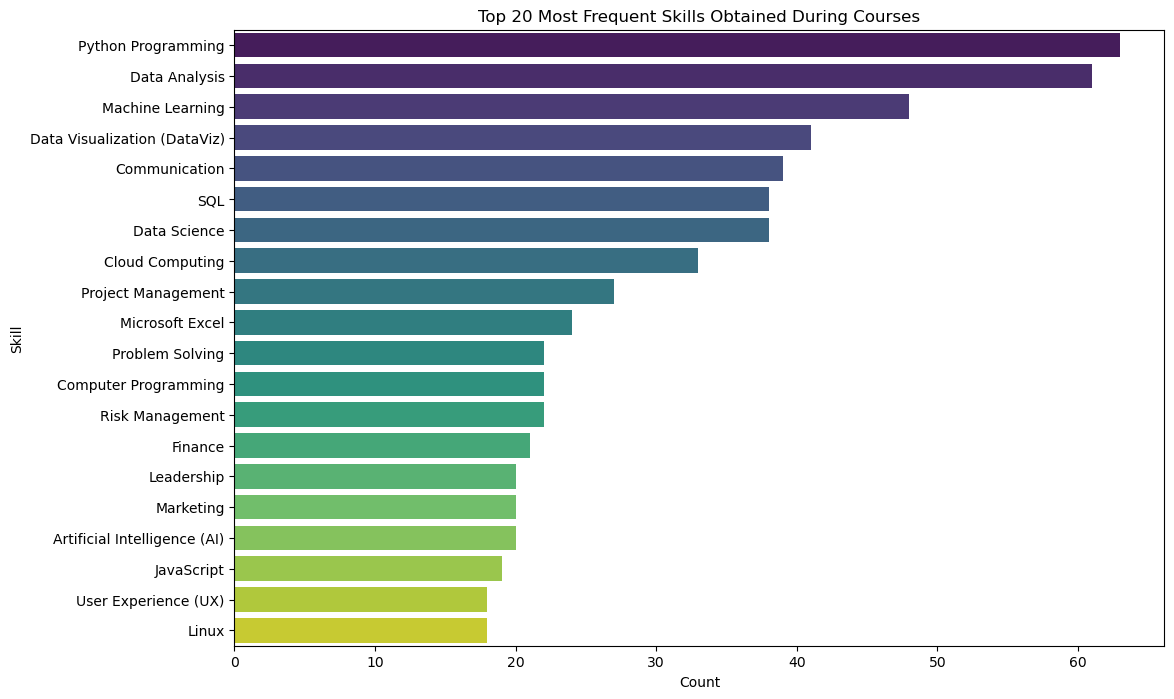

In [19]:
def plot_top_skills(dataframe, title):
    top_skills = dataframe.head(20)

    plt.figure(figsize=(12, 8))
    sns.barplot(x='count', y='skill', data = top_skills, palette='viridis', order = top_skills.sort_values('count', ascending=False)['skill'])
    plt.title(title)
    plt.xlabel('Count')
    plt.ylabel('Skill')
    plt.show()


plot_top_skills(course_skills_df, 'Top 20 Most Frequent Skills Obtained During Courses')


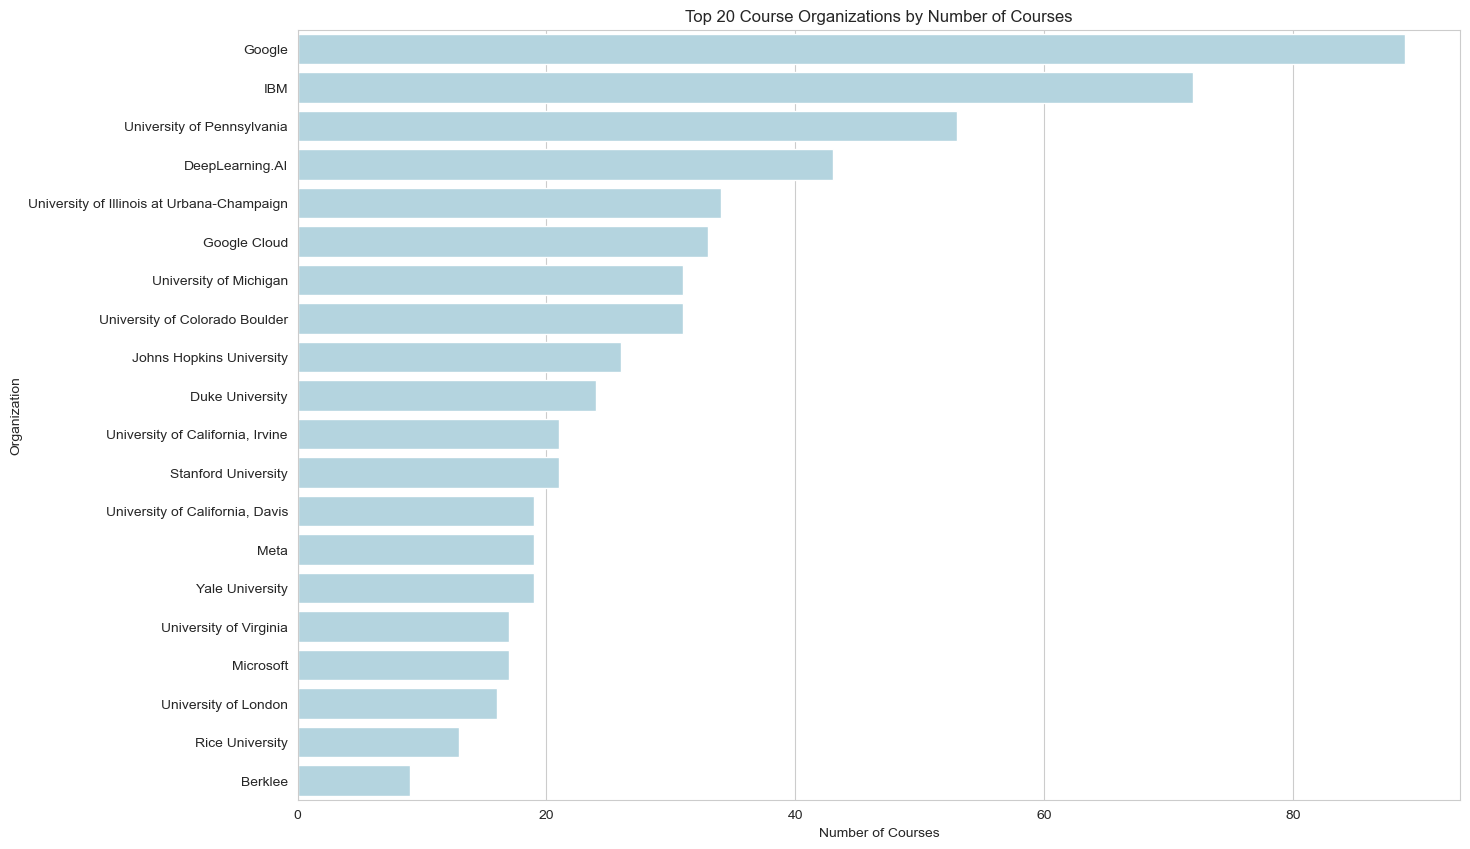

In [20]:
#Top course from  organizations by number of courses in Coursera
tmp_df = pd.DataFrame(courses['course_organization'].value_counts()).reset_index()
tmp_df.columns = ['course_organization', 'count']

# Sort the DataFrame by count in descending order
tmp_df = tmp_df.sort_values(by='count', ascending=False)

sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(15, 10))
ax = sns.barplot(data=tmp_df.head(20), x='count', y='course_organization', color='lightblue')
ax.set_xlabel('Number of Courses')
ax.set_ylabel('Organization')
ax.set_title('Top 20 Course Organizations by Number of Courses')
plt.show()

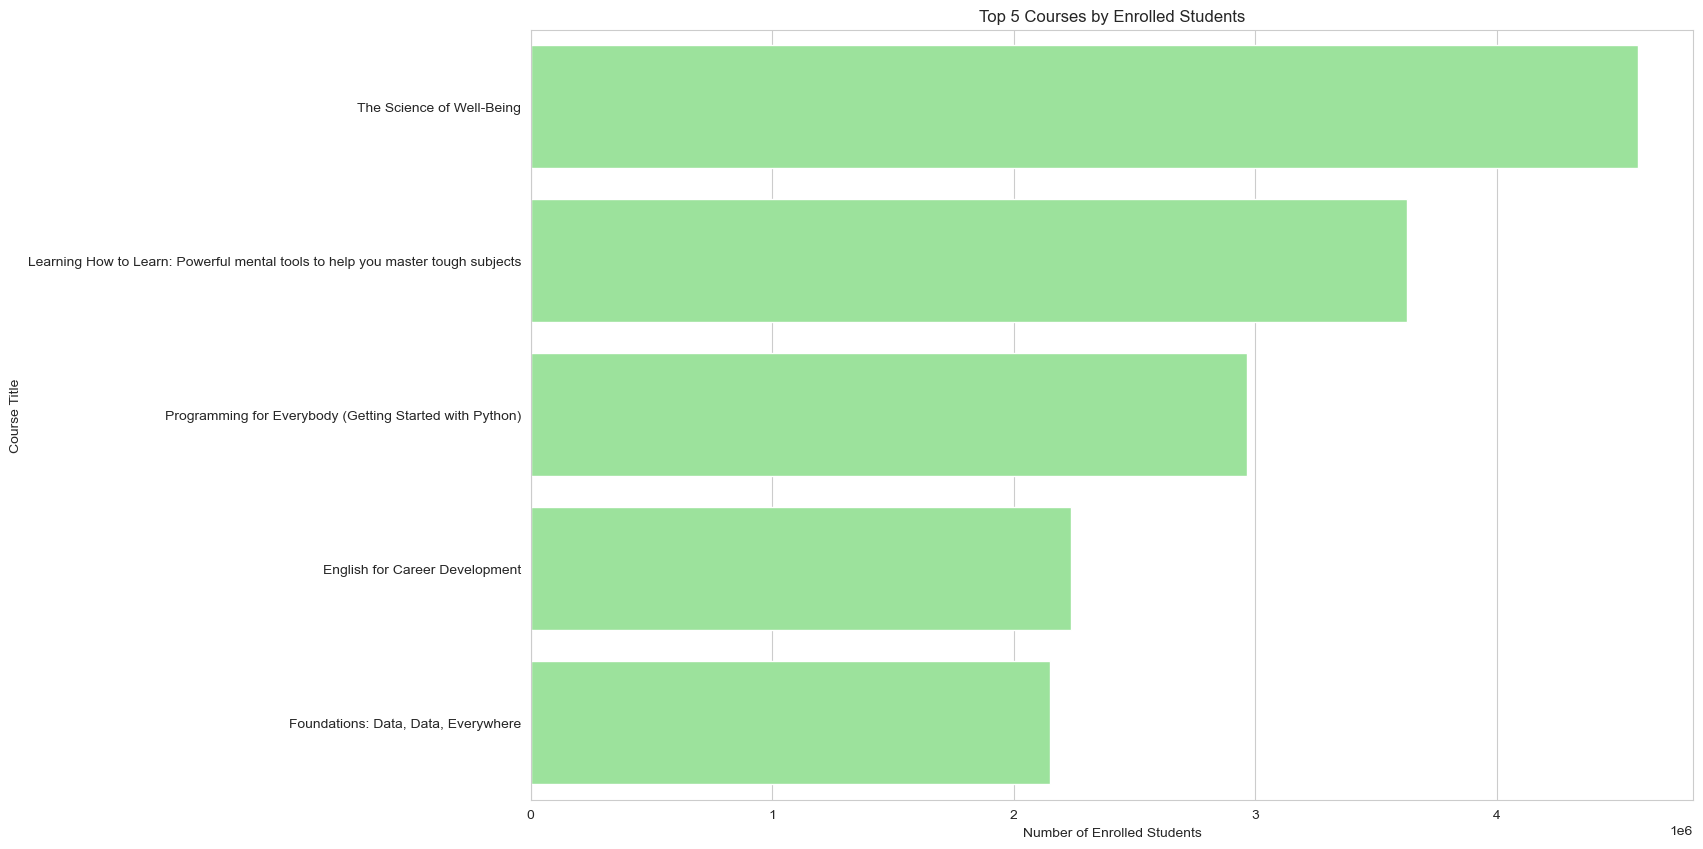

In [21]:
#what are the Top 5 courses by enrolled students?
top_courses_df = courses.sort_values(by='course_students_enrolled', ascending=False)[['course_title', 'course_students_enrolled']]

f, ax = plt.subplots(figsize=(15, 10))
ax = sns.barplot(data = top_courses_df[:5], x='course_students_enrolled', y='course_title', color='lightgreen')
ax.set_xlabel('Number of Enrolled Students')
ax.set_ylabel('Course Title')
ax.set_title('Top 5 Courses by Enrolled Students')
plt.show()

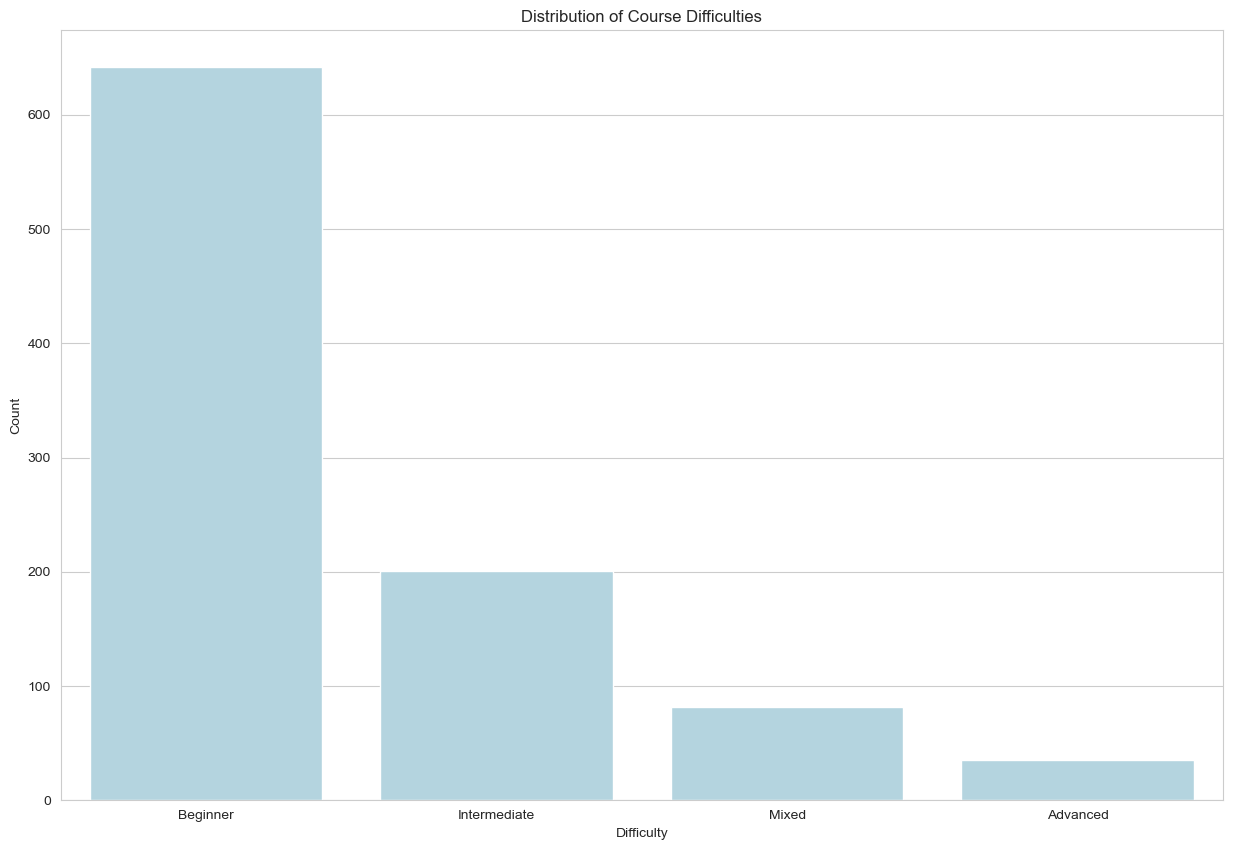

In [22]:
#Distribution of course difficulties
f, ax = plt.subplots(figsize=(15, 10))
ax = sns.countplot(data=courses, x='course_difficulty', color='lightblue')
ax.set_xlabel('Difficulty')
ax.set_ylabel('Count')
ax.set_title('Distribution of Course Difficulties')
plt.show()

In [ ]:
#Most of the courses offered are at the beginner level, as the level increases there are fewer courses

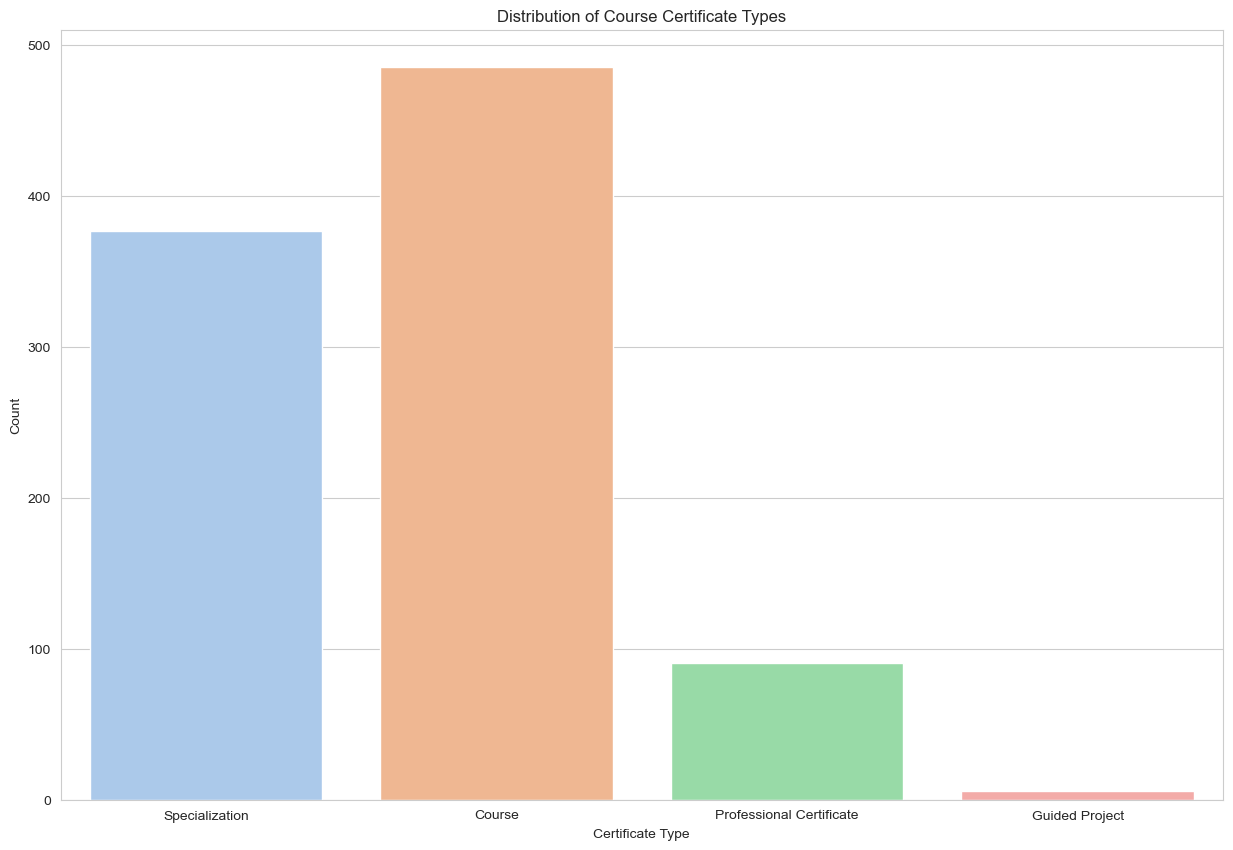

In [23]:
#Distribution of course certificate types
f, ax = plt.subplots(figsize=(15, 10))
ax = sns.countplot(data=courses, x='course_certificate_type', palette="pastel")
ax.set_xlabel('Certificate Type')
ax.set_ylabel('Count')
ax.set_title('Distribution of Course Certificate Types')
plt.show()

In [ ]:
#Most courses provide a certificate of course completion

In [24]:
courses.head()

,index,course_title,course_organization,course_certificate_type,course_time,course_rating,course_reviews_num,course_difficulty,course_students_enrolled,course_skills
0,196,(ISC)² Systems Security Certified Practitioner...,ISC2,Specialization,3 - 6 Months,4.7,484,Beginner,6706,"['Web API', 'Web Development', 'Cascading Styl..."
1,648,.NET FullStack Developer,Board Infinity,Specialization,1 - 3 Months,4.3,49,Intermediate,2140,"['Risk Management', 'Access Control', 'Asset',..."
2,928,21st Century Energy Transition: how do we make...,University of Alberta,Course,1 - 3 Months,4.8,59,Beginner,4282,"['Instrumental Variable', 'Propensity Score Ma..."
3,580,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,Course,1 - 3 Months,4.7,515,Intermediate,38833,"['differential diagnosis and comorbidities', '..."
5,433,AI & Law,Lund University,Course,1 - 4 Weeks,4.7,361,Beginner,25442,"['Punctuation', 'Essay Writing', 'Academic Wri..."


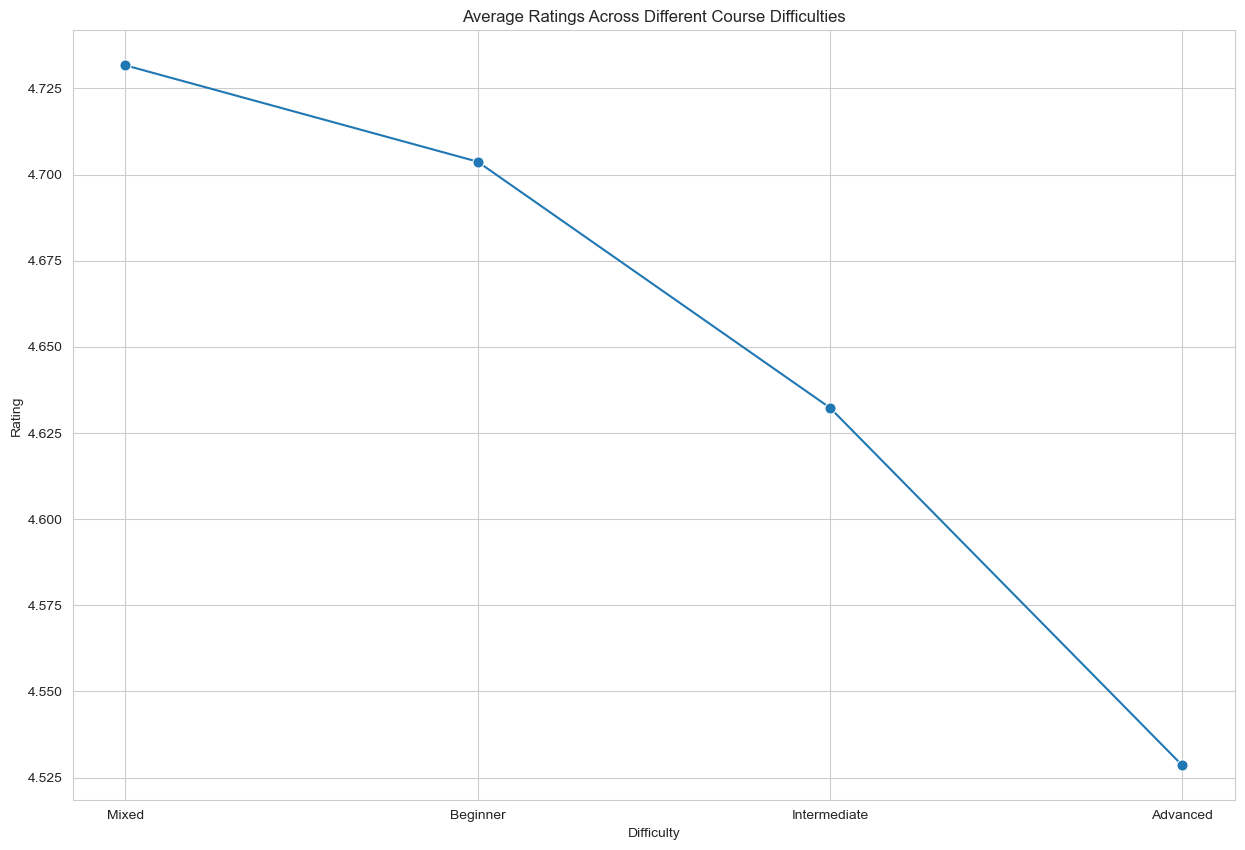

  course_difficulty  course_rating
0             Mixed       4.731707
1          Beginner       4.703738
2      Intermediate       4.632338
3          Advanced       4.528571


In [25]:
#Does difficulty affect  by rating?
sns.set_style('whitegrid')


top_difficulty = pd.DataFrame(courses.groupby('course_difficulty')['course_rating']
                              .mean()
                              .sort_values(ascending=False)).reset_index()


f, ax = plt.subplots(figsize=(15, 10))
ax = sns.lineplot(data=top_difficulty, x='course_difficulty', y='course_rating', marker='o', markersize=8)
ax.set_xlabel('Difficulty')
ax.set_ylabel('Rating')
ax.set_title('Average Ratings Across Different Course Difficulties')

plt.show()

print(top_difficulty)



In [26]:
top_difficulty = pd.DataFrame(courses.groupby('course_difficulty')['course_rating']
                              .median()
                              .sort_values(ascending=False)).reset_index()
top_difficulty

# The means are different, but the medians are the same


,course_difficulty,course_rating
0,Mixed,4.8
1,Advanced,4.7
2,Beginner,4.7
3,Intermediate,4.7


In [29]:
difference = pd.DataFrame(courses.groupby('course_difficulty')['course_rating'].agg(['mean', 'std', 'count'])).reset_index()
difference

,course_difficulty,mean,std,count
0,Advanced,4.528571,0.359388,35
1,Beginner,4.703738,0.136544,642
2,Intermediate,4.632338,0.222034,201
3,Mixed,4.731707,0.136877,82


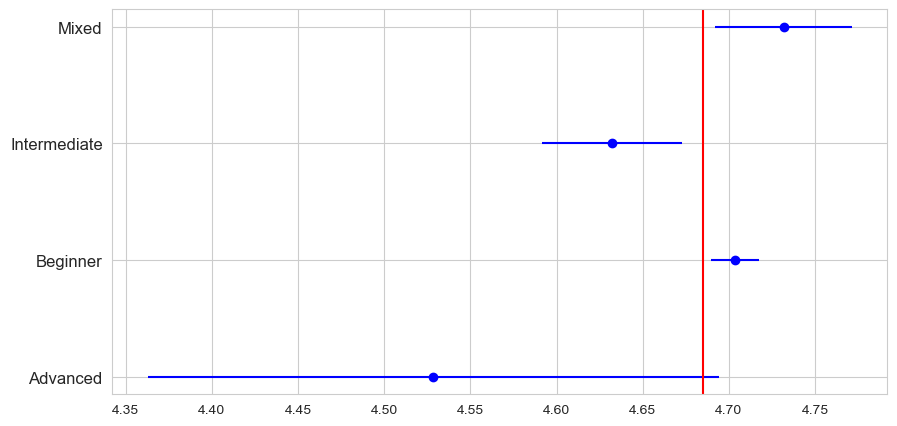

In [32]:
#  creating a plot with error bars to visualize the variability of mean val, the red line is overall mean of course ratings.
alpha = 0.01
difference['critical t-value'] = difference['count'].apply(lambda w: stats.t(w - 1).ppf(1 - alpha/2))
difference['step'] = difference['critical t-value'] * difference['std'] / np.sqrt(difference['count'])

center = difference['mean'].values
step = difference['step'].values

mean_value = courses['course_rating'].mean()
f, ax = plt.subplots(figsize=(10, 5))
plt.errorbar(center, np.arange(center.size), xerr=step, capsize=0, fmt='o', color='blue')
plt.yticks(np.arange(center.size - 1, -1, -1), difference['course_difficulty'][::-1], fontsize=12);
plt.axvline(mean_value, 0, color='red');


#On average, the ratings of intermediate and advanced are lower than those of mixed and beginner

In [ ]:
#ANOVA test

In [35]:
from scipy.stats import f_oneway

ratings_by_difficulty = [courses['course_rating'][courses['course_difficulty'] == difficulty] for difficulty in courses['course_difficulty'].unique()]


f_statistic, p_value = f_oneway(*ratings_by_difficulty)

print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: There are significant differences in ratings between difficulty levels.")
else:
    print("Fail to reject the null hypothesis: No significant differences in ratings between difficulty levels.")



F-statistic: 20.901310491797595
P-value: 4.0348167978303095e-13
Reject the null hypothesis: There are significant differences in ratings between difficulty levels.


In [ ]:
#There are significant differences in course_rating between difficulty levels.
# That is, it can be said that there is a difference in course_rating between the different difficulty levels of the courses

In [39]:
#Does difficulty affect number of enrolled students?
courses.groupby('course_difficulty')[['course_students_enrolled']].agg(['mean', 'median', 'std'])

course_students_enrolled                         
                                      mean    median            std
course_difficulty                                                  
Advanced                      46462.628571   27438.0   59420.829559
Beginner                     145385.007788   46699.5  308185.422382
Intermediate                  84116.437811   36052.0  150460.115899
Mixed                        296270.670732  148787.0  578259.394371

In [40]:

enrollment_by_difficulty = [courses['course_students_enrolled'][courses['course_difficulty'] == difficulty] for difficulty in courses['course_difficulty'].unique()]


f_statistic, p_value = f_oneway(*enrollment_by_difficulty)


print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

# Interpret the results
if p_value < 0.05:
    print("Reject the null hypothesis: There are significant differences in the number of enrolled students between difficulty levels.")
else:
    print("Fail to reject the null hypothesis: No significant differences in the number of enrolled students between difficulty levels.")

F-statistic: 10.156567685228982
P-value: 1.3734866362609942e-06
Reject the null hypothesis: There are significant differences in the number of enrolled students between difficulty levels.


In [ ]:
#there is statistical evidence to support the claim that there are significant differences in the number of enrolled students between difficulty levels.


In [ ]:
#final conclusions


#If your organization intends to offer a course, 
#it is recommended that the courses contain the skills that are on the Top 20 Most Frequent Skills list, 
#as the level of the course increases, the number of students enrolled decreases and so does the rating of the course


In [ ]:
#Future research questions


#Does the price have an effect on the number of people registering for the course?

# How many students come back to do another course on the site?

# How many students were hired following a course on the site?